<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-subjects/blob/main/9_Dilation_Erosion_and_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dilation, Erosion and Edge Detection**

- **Erosion** – Görüntüdeki nesnelerin sınırlarındaki pikselleri kaldırır
- **Dilation** – Görüntüdeki nesnelerin sınırlarına piksel ekler
- **Opening** - Erosion ve ardından dilation
- **Closing** - Dilation ve ardından erosion 

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

## **Erosion**

* Ön plan nesnesinin sınırlarını aşındırır
* Bir görüntünün özelliklerini azaltmak için kullanılır.



In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

#görüntüyü gri sklaya çeviriyoruz
image = cv2.imread("/content/opencv.png",0)
ret,th = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(th, kernel, iterations=1)

Text(0.5, 1.0, 'Erosion')

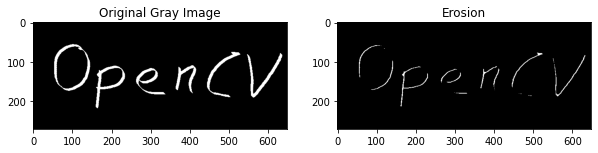

In [2]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1) 
plt.imshow(th, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 2, 2)
plt.imshow(erosion, cmap="gray")
plt.title("Erosion")



## **Dilation**

* Nesne alanını artırır
* Özellikleri vurgulamak için kullanılır

In [3]:
image = cv2.imread("/content/opencv.png",0)
ret,th = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)

Text(0.5, 1.0, 'Dilation')

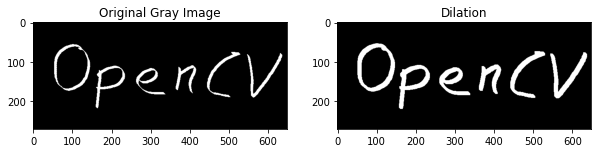

In [4]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1) 
plt.imshow(th, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 2, 2)
plt.imshow(dilation, cmap="gray")
plt.title("Dilation")

## **Opening and Closing**

İkiside gürültüyü gidermek için iyi.

Text(0.5, 1.0, 'Closing')

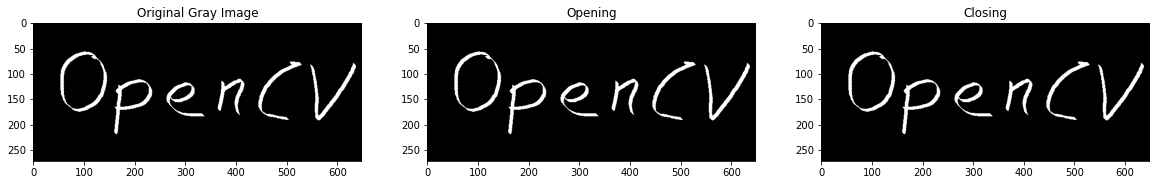

In [50]:
img = cv2.imread("/content/opencv.png",0)
ret,th = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((1,1), np.uint8)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)


fig = plt.figure(figsize=(20, 15))

fig.add_subplot(1, 3, 1) 
plt.imshow(th, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 3, 2)
plt.imshow(opening, cmap="gray")
plt.title("Opening")

fig.add_subplot(1, 3, 3)
plt.imshow(closing, cmap="gray")
plt.title("Closing")

# **Canny Edge Detection**

Eşik değerleri vererek kenar bulma işlemi yapar.


In [18]:
import cv2
import matplotlib.pyplot as plt

image= cv2.imread("/content/Cars14.png",0)

#İlk eşik gradyanı
canny1 = cv2.Canny(image, 50 , 120)

#Geniş kenar eşikleri, çok sayıda kenar bekler
canny2 = cv2.Canny(image, 10 , 200)

#Dar eşik, daha az kenar bekleyin
canny3 = cv2.Canny(image, 200 , 240)

canny4 = cv2.Canny(image, 60 , 110)


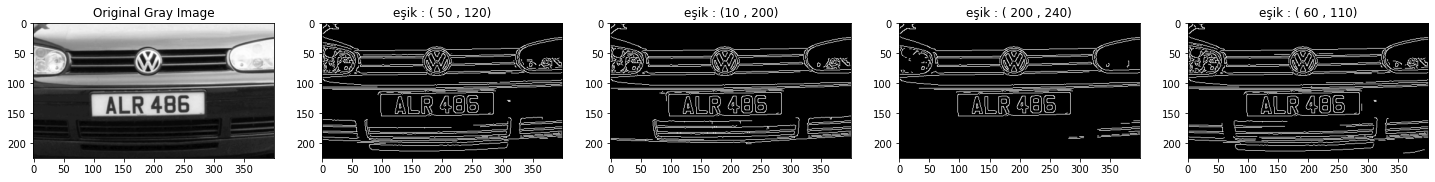

Text(0.5, 1.0, 'Canny Edge')

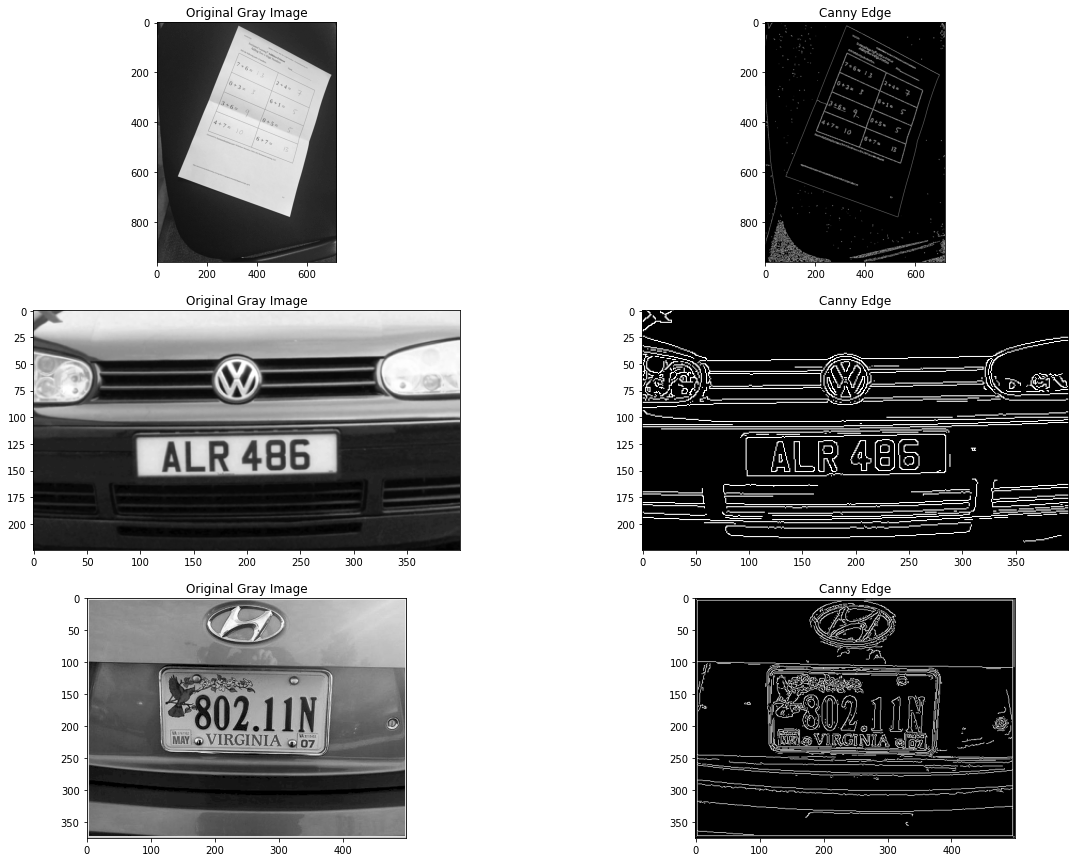

In [25]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

im1 = cv2.imread("/content/scan.jpg",0)
im2 = cv2.imread("/content/Cars14.png",0)
im3 = cv2.imread("/content/Cars6.png",0)

fig = plt.figure(figsize=(20, 15))

fig.add_subplot(3, 2, 1) 
plt.imshow(im1, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(3, 2, 2)
plt.imshow(cv2.Canny(im1, 60 , 110), cmap="gray")
plt.title("Canny Edge")

fig.add_subplot(3, 2, 3) 
plt.imshow(im2, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(3, 2, 4)
plt.imshow(cv2.Canny(im2, 60 , 110), cmap="gray")
plt.title("Canny Edge")


fig.add_subplot(3, 2, 5) 
plt.imshow(im3, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(3, 2, 6)
plt.imshow(cv2.Canny(im3, 60 , 110), cmap="gray")
plt.title("Canny Edge")


## **Auto Canny**



In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def autoCanny(image):
  #kenarları yumuşatmak ve ayrıntıları azaltmak için bulanıklaştırma işlemi yapıyoruz
  blurr = cv2.blur(image, ksize=(5,5))
  med_val = np.median(blurr)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))

  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

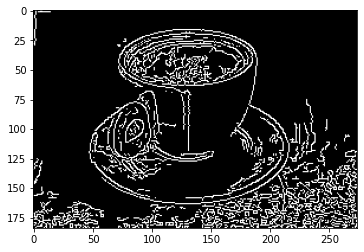

In [43]:
im = cv2.imread("/content/coffee.jpg",0)
d = autoCanny(im)
plt.imshow(d, cmap="gray")

**⚡ Canny ile kenar bulma işleminde çok fazla gürültülü bir sonuç elde ediyoruz. Bunu önlemek amacıyla bulanıklaştırma, binarizasyon ve gürültü azaltma gibi görüntü önişleme adımları uygulanabilir.**